# Importing libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
dataset = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [27]:
from sklearn.utils import shuffle
dataset = shuffle(dataset, random_state = 42)

# Extracting features

In [28]:
x = dataset.iloc[:, 1:8].values
y = dataset.iloc[:, -1].values

In [29]:
#scaling the features
from sklearn.preprocessing import StandardScaler as SC
sc = SC()
x = sc.fit_transform(x)
print(x[0])

[1.55337086 1.44968975 0.77558214 0.63231549 0.01730621 1.59474966
 0.88640526]


# PCA

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1) 
x = pca.fit_transform(x)
p_var = pca.explained_variance_ratio_
print(p_var)
print(x)

[0.67519343]
[[-2.68256647e+00]
 [-1.47251688e+00]
 [ 2.44595447e+00]
 [ 6.52486727e-01]
 [-1.07316917e+00]
 [-2.33955813e+00]
 [ 4.45072865e+00]
 [ 1.25599624e+00]
 [-1.08288678e+00]
 [-1.43077613e+00]
 [ 1.93500707e-01]
 [ 2.66358862e-01]
 [ 4.28350380e-01]
 [-3.67384524e+00]
 [-9.88027040e-01]
 [ 3.93133913e+00]
 [-2.43806038e+00]
 [ 2.03923591e+00]
 [ 3.55385690e+00]
 [ 1.85945586e+00]
 [ 8.77654102e-01]
 [ 1.93919629e+00]
 [-3.54642120e-01]
 [-1.09123280e+00]
 [-6.84709567e-01]
 [ 1.88654555e+00]
 [-3.91072426e+00]
 [-2.36931084e+00]
 [ 1.84372106e+00]
 [-1.06317637e+00]
 [ 2.16791143e+00]
 [ 4.54138011e-01]
 [ 2.95336265e+00]
 [-2.25049153e+00]
 [ 5.50991453e-01]
 [-1.96744431e-01]
 [ 3.52252732e+00]
 [-4.10021526e+00]
 [ 6.21886094e-01]
 [ 1.75083102e-01]
 [-3.79025863e+00]
 [ 2.15677173e+00]
 [ 1.22091347e+00]
 [-2.50421939e+00]
 [-3.33031242e+00]
 [ 2.74493838e+00]
 [-3.56837458e+00]
 [-2.10122921e+00]
 [-1.59685267e+00]
 [-3.72751318e+00]
 [-3.11211897e+00]
 [ 2.42410600e+00]

# MLR

In [31]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split as TTS
x_train, x_test, y_train, y_test = TTS(x, y, test_size = 0.25, random_state = 0)

In [32]:
# training the model
from sklearn.linear_model import LinearRegression as LR
lr = LR()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [33]:
# checking for errors
import sklearn.metrics as met
print('MSE = ', met.mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(met.mean_squared_error(y_test, y_pred)))
print('R2 = ', met.r2_score(y_test, y_pred))

MSE =  0.0046770118391585395
RMSE =  0.06838868209841845
R2 =  0.7853506666770875


# Plotting the model

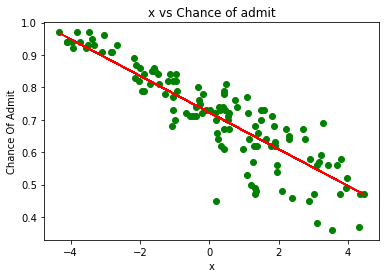

In [34]:
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test, y_pred, color = 'red')
plt.title('x vs Chance of admit')
plt.xlabel('x')
plt.ylabel('Chance Of Admit')
plt.show()

# Predicted vs Actual output plot

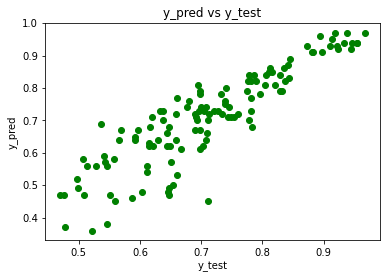

In [35]:
plt.scatter(y_pred, y_test, color = 'green')
plt.title('y_pred vs y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

Text(0.5, 1.0, 'Predicted')

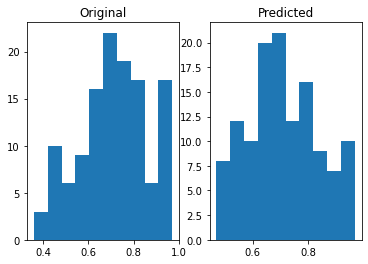

In [36]:
plt.subplot(1,2,1)
plt.hist(y_test, bins = 10)
plt.title("Original")
plt.subplot(1,2,2)
plt.hist(y_pred, bins = 10)
plt.title("Predicted")